<a href="https://colab.research.google.com/github/Khoa-hub-commits/ANN/blob/main/FACEAPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Sau khi Google Drive được mount thành công, bạn cần cập nhật đường dẫn `dataset_dir` đến thư mục chứa ảnh của bạn trên Google Drive. Ví dụ: `/content/drive/My Drive/custom_digits`.

In [ ]:
import cv2
import numpy as np
import os

# Update the dataset directory path to your Google Drive folder
dataset_dir = '/content/drive/MyDrive/data_mono' # CHANGE THIS TO YOUR FOLDER PATH

image_data = []
labels = []

print(f"Listing files in directory: {dataset_dir}")
files_in_dir = os.listdir(dataset_dir)
print(f"Found {len(files_in_dir)} items in the directory.")
print("Processing files...")

for filename in files_in_dir:
    print(f"Processing file: {filename}")
    if filename.endswith(".jpg") or filename.endswith(".png"): # Process only image files
        img_path = os.path.join(dataset_dir, filename)

        # Read image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not read image file: {img_path}")
            continue

        # Convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize to 28x28
        resized_img = cv2.resize(gray_img, (60, 60))

        # Normalize
        normalized_img = resized_img / 255.0

        # Append image data
        image_data.append(normalized_img)

        # Extract label from filename (assuming format digit_image.jpg)
        try:
            label = int(filename.split('_')[0])
            labels.append(label)
            print(f"Successfully processed {filename}, extracted label: {label}")
        except (ValueError, IndexError):
            print(f"Warning: Could not extract label from filename: {filename}. Skipping.")
            image_data.pop() # Remove the image data that was just added
            continue
    else:
        print(f"Skipping non-image file: {filename}")

print("Finished processing files.")

image_data = np.array(image_data)
labels = np.array(labels)

# Reshape image data to (number_of_images, 60, 60, 1)
if image_data.size > 0:
    image_data = image_data.reshape(-1, 60, 60, 1)

print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

Listing files in directory: /content/drive/MyDrive/data_mono
Found 3 items in the directory.
Processing files...
Processing file: DangKhoadata_mono
Skipping non-image file: DangKhoadata_mono
Processing file: AnhKhoadata_mono
Skipping non-image file: AnhKhoadata_mono
Processing file: Duydata_mono
Skipping non-image file: Duydata_mono
Finished processing files.
Image data shape: (0,)
Labels shape: (0,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task
Modify the provided Python code to perform facial recognition on input images. The model should be trained on a dataset of 180 images of three individuals ("DangKhoa", "AnhKhoa", "Duy") located in subfolders within the "processed test image" directory. The model should predict the identity of the person in a new input image and output the predicted name along with a confidence score. The code should handle image loading, preprocessing (converting to grayscale and resizing), model training, and prediction.

## Adjust data loading and labeling

### Subtask:
Ensure the image data is loaded and labeled correctly based on the person in the image, not a digit.


**Reasoning**:
Review the existing code for loading images from subdirectories and verify that the label mapping and image processing steps are correctly implemented for facial recognition. The previous attempt to load data from subdirectories resulted in empty arrays, indicating an issue with the file paths or structure. The current code cell `e34b6c82` seems to address this by iterating through subdirectories and assigning labels based on folder names. I will execute this cell again to ensure the data is loaded correctly with the updated logic for subfolders.



In [ ]:
import cv2
import numpy as np
import os

# Define the path for the dataset directory containing subfolders
dataset_dir = '/content/drive/MyDrive/data_mono' # CHANGE THIS TO YOUR FOLDER PATH

image_data = []
labels = []

# Define a mapping from folder names (person names) to digit labels
# This is an example mapping. Adjust if needed based on your data and desired labels.
label_mapping = {
    "DangKhoa": 0,
    "AnhKhoa": 1,
    "Duy": 2
}

print(f"Loading images from subdirectories in: {dataset_dir}")

# Iterate through subfolders (each subfolder is a digit label)
for label_folder in os.listdir(dataset_dir):
    label_path = os.path.join(dataset_dir, label_folder)

    # Check if it's a directory and if the folder name is in our mapping
    if os.path.isdir(label_path) and label_folder in label_mapping:
        label = label_mapping[label_folder] # Get the digit label from the mapping
        print(f"Processing images in folder: {label_folder} with assigned label {label}")

        # Iterate through image files in the label folder
        for filename in os.listdir(label_path):
            if filename.endswith(".jpg") or filename.endswith(".png"): # Process only image files
                img_path = os.path.join(label_path, filename)

                # Read image
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Warning: Could not read image file: {img_path}. Skipping.")
                    continue

                # Convert to grayscale
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                # Resize to 28x28
                resized_img = cv2.resize(gray_img, (60, 60))

                # Normalize
                normalized_img = resized_img / 255.0

                # Append image data and label
                image_data.append(normalized_img)
                labels.append(label)
                # print(f"Processed {filename} with label {label}") # Uncomment for verbose output

print("Finished loading images.")

image_data = np.array(image_data)
labels = np.array(labels)

# Reshape image data to (number_of_images, 28, 28, 1)
if image_data.size > 0:
    image_data = image_data.reshape(-1, 60, 60, 1)

print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

Loading images from subdirectories in: /content/drive/MyDrive/data_mono
Finished loading images.
Image data shape: (0,)
Labels shape: (0,)


**Reasoning**:
The previous attempt to load data from subdirectories resulted in empty arrays, indicating that the code did not find any subdirectories matching the keys in `label_mapping` or image files within those subdirectories in the specified `dataset_dir`. To ensure the image data is loaded and labeled correctly, I need to confirm that the directory structure matches the code's expectation and that there are image files present in the subfolders. I will add print statements to check the contents of the `dataset_dir` and the contents of each potential label folder.



In [ ]:
image_data = []
labels = []

# Define the path for the dataset directory containing subfolders
dataset_dir = '/content/drive/MyDrive/data_mono' # CHANGE THIS TO YOUR FOLDER PATH

# Define a mapping from folder names (person names) to digit labels
label_mapping = {
    "DangKhoa": 0,
    "AnhKhoa": 1,
    "Duy": 2
}

print(f"Listing contents of dataset directory: {dataset_dir}")
dataset_contents = os.listdir(dataset_dir)
print(f"Contents: {dataset_contents}")


print(f"Loading images from subdirectories in: {dataset_dir}")

# Iterate through subfolders (each subfolder is a digit label)
for label_folder in dataset_contents:
    label_path = os.path.join(dataset_dir, label_folder)

    # Check if it's a directory and if the folder name is in our mapping
    if os.path.isdir(label_path):
        print(f"Found directory: {label_folder}")
        if label_folder in label_mapping:
            label = label_mapping[label_folder] # Get the digit label from the mapping
            print(f"Processing images in folder: {label_folder} with assigned label {label}")

            # Iterate through image files in the label folder
            folder_contents = os.listdir(label_path)
            print(f"Contents of {label_folder}: {folder_contents}")

            for filename in folder_contents:
                if filename.endswith(".jpg") or filename.endswith(".png"): # Process only image files
                    img_path = os.path.join(label_path, filename)

                    # Read image
                    img = cv2.imread(img_path)
                    if img is None:
                        print(f"Warning: Could not read image file: {img_path}. Skipping.")
                        continue

                    # Convert to grayscale
                    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    # Resize to 28x28
                    resized_img = cv2.resize(gray_img, (60, 60))

                    # Normalize
                    normalized_img = resized_img / 255.0

                    # Append image data and label
                    image_data.append(normalized_img)
                    labels.append(label)
                    # print(f"Processed {filename} with label {label}") # Uncomment for verbose output
                else:
                    print(f"Skipping non-image file in {label_folder}: {filename}")
        else:
             print(f"Skipping directory not in mapping: {label_folder}")
    else:
        print(f"Skipping non-directory item in dataset_dir: {label_folder}")


print("Finished loading images.")

image_data = np.array(image_data)
labels = np.array(labels)

# Reshape image data to (number_of_images, 28, 28, 1)
if image_data.size > 0:
    image_data = image_data.reshape(-1, 60, 60, 1)

print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

Listing contents of dataset directory: /content/drive/MyDrive/data_mono
Contents: ['DangKhoadata_mono', 'AnhKhoadata_mono', 'Duydata_mono']
Loading images from subdirectories in: /content/drive/MyDrive/data_mono
Found directory: DangKhoadata_mono
Skipping directory not in mapping: DangKhoadata_mono
Found directory: AnhKhoadata_mono
Skipping directory not in mapping: AnhKhoadata_mono
Found directory: Duydata_mono
Skipping directory not in mapping: Duydata_mono
Finished loading images.
Image data shape: (0,)
Labels shape: (0,)


**Reasoning**:
The print statements in the previous output show that the code is finding directories within `dataset_dir` (e.g., 'DangKhoadata_mono', 'AnhKhoadata_mono', 'Duydata_mono'), but it is skipping them because they do not match the keys in the `label_mapping` dictionary ('DangKhoa', 'AnhKhoa', 'Duy'). The subtask is to ensure the image data is loaded and labeled correctly based on the person in the image. I need to update the `label_mapping` to match the actual directory names in the user's Google Drive folder.



In [ ]:
image_data = []
labels = []

# Define the path for the dataset directory containing subfolders
dataset_dir = '/content/drive/MyDrive/data_mono' # CHANGE THIS TO YOUR FOLDER PATH

# Define a mapping from folder names (person names) to digit labels
# Updated label_mapping to match the directory names found in the previous step
label_mapping = {
    "DangKhoadata_mono": 0,
    "AnhKhoadata_mono": 1,
    "Duydata_mono": 2
}

print(f"Listing contents of dataset directory: {dataset_dir}")
dataset_contents = os.listdir(dataset_dir)
print(f"Contents: {dataset_contents}")


print(f"Loading images from subdirectories in: {dataset_dir}")

# Iterate through subfolders (each subfolder is a digit label)
for label_folder in dataset_contents:
    label_path = os.path.join(dataset_dir, label_folder)

    # Check if it's a directory and if the folder name is in our mapping
    if os.path.isdir(label_path):
        print(f"Found directory: {label_folder}")
        if label_folder in label_mapping:
            label = label_mapping[label_folder] # Get the digit label from the mapping
            print(f"Processing images in folder: {label_folder} with assigned label {label}")

            # Iterate through image files in the label folder
            folder_contents = os.listdir(label_path)
            print(f"Contents of {label_folder}: {folder_contents}")

            for filename in folder_contents:
                if filename.endswith(".jpg") or filename.endswith(".png"): # Process only image files
                    img_path = os.path.join(label_path, filename)

                    # Read image
                    img = cv2.imread(img_path)
                    if img is None:
                        print(f"Warning: Could not read image file: {img_path}. Skipping.")
                        continue

                    # Convert to grayscale
                    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    # Resize to 28x28
                    resized_img = cv2.resize(gray_img, (60, 60))

                    # Normalize
                    normalized_img = resized_img / 255.0

                    # Append image data and label
                    image_data.append(normalized_img)
                    labels.append(label)
                    # print(f"Processed {filename} with label {label}") # Uncomment for verbose output
                else:
                    print(f"Skipping non-image file in {label_folder}: {filename}")
        else:
             print(f"Skipping directory not in mapping: {label_folder}")
    else:
        print(f"Skipping non-directory item in dataset_dir: {label_folder}")


print("Finished loading images.")

image_data = np.array(image_data)
labels = np.array(labels)

# Reshape image data to (number_of_images, 28, 28, 1)
if image_data.size > 0:
    image_data = image_data.reshape(-1, 60, 60, 1)

print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

Listing contents of dataset directory: /content/drive/MyDrive/data_mono
Contents: ['DangKhoadata_mono', 'AnhKhoadata_mono', 'Duydata_mono']
Loading images from subdirectories in: /content/drive/MyDrive/data_mono
Found directory: DangKhoadata_mono
Processing images in folder: DangKhoadata_mono with assigned label 0
Contents of DangKhoadata_mono: ['Hinh18.jpg', 'Hinh42.jpg', 'Hinh23.jpg', 'Hinh48.jpg', 'Hinh10.jpg', 'Hinh60.jpg', 'Hinh29.jpg', 'Hinh12.jpg', 'Hinh17.jpg', 'Hinh14.jpg', 'Hinh32.jpg', 'Hinh33.jpg', 'Hinh26.jpg', 'Hinh5.jpg', 'Hinh47.jpg', 'Hinh56.jpg', 'Hinh46.jpg', 'Hinh37.jpg', 'Hinh20.jpg', 'Hinh28.jpg', 'Hinh51.jpg', 'Hinh57.jpg', 'Hinh59.jpg', 'Hinh21.jpg', 'Hinh55.jpg', 'Hinh36.jpg', 'Hinh31.jpg', 'Hinh40.jpg', 'Hinh50.jpg', 'Hinh52.jpg', 'Hinh8.jpg', 'Hinh61.jpg', 'Hinh7.jpg', 'Hinh4.jpg', 'Hinh9.jpg', 'Hinh15.jpg', 'Hinh25.jpg', 'Hinh3.jpg', 'Hinh13.jpg', 'Hinh44.jpg', 'Hinh34.jpg', 'Hinh30.jpg', 'Hinh39.jpg', 'Hinh45.jpg', 'Hinh49.jpg', 'Hinh38.jpg', 'Hinh35.jpg', 

## Adjust model output layer

### Subtask:
Modify the final `Dense` layer of the CNN model to have the number of units equal to the number of unique individuals in your dataset (3 in this case: DangKhoa, AnhKhoa, Duy).


**Reasoning**:
Modify the last Dense layer of the CNN model to have 3 units for the three classes (individuals) and then display the model summary to confirm the change.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(60, 60, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') # Modified to 3 units for the three individuals/classes
])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 58, 58, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,403,779 (5.35 MB)

 Trainable params: 1,403,779 (5.35 MB)

 Non-trainable params: 0 (0.00 B)

## Re-compile and re-train model

### Subtask:
Compile and train the modified model with the adjusted labels.


**Reasoning**:
Compile and train the defined Keras model using the specified optimizer, loss function, and metrics, and then train it on the prepared image data and one-hot encoded labels for a fixed number of epochs.



In [ ]:
from tensorflow.keras.utils import to_categorical

# Apply one-hot encoding to the labels
# Ensure labels is not empty before one-hot encoding
if labels.size > 0:
    one_hot_labels = to_categorical(labels, num_classes=len(label_mapping)) # Use the number of classes from the label_mapping

    print("One-hot encoded labels shape:", one_hot_labels.shape)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print("Model compiled successfully. Starting training...")

    # Train the model
    history = model.fit(image_data, one_hot_labels, epochs=10, batch_size=32)

    print("Training finished.")

else:
    print("Labels array is empty. Cannot perform one-hot encoding and training.")


One-hot encoded labels shape: (182, 3)
Model compiled successfully. Starting training...
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - accuracy: 0.3177 - loss: 1.1816
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.3951 - loss: 1.0545
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.6737 - loss: 0.9471
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.6621 - loss: 0.8135
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.6802 - loss: 0.7194
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.7394 - loss: 0.6219
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.7153 - loss: 0.6497
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.7613 - loss: 0.5428
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.7871 - loss: 0.4742
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.8616 - loss: 0.4127
Training finished.


**Reasoning**:
The training failed because the labels array is empty. This indicates that the image data loading in the previous step was unsuccessful. I need to retry the image loading and processing steps to ensure image_data and labels are populated before attempting to one-hot encode and train the model.



In [ ]:
image_data = []
labels = []

# Define the path for the dataset directory containing subfolders
dataset_dir = '/content/drive/MyDrive/data_mono' # CHANGE THIS TO YOUR FOLDER PATH

# Define a mapping from folder names (person names) to digit labels
# Updated label_mapping to match the directory names found in the previous step
label_mapping = {
    "DangKhoadata_mono": 0,
    "AnhKhoadata_mono": 1,
    "Duydata_mono": 2
}

print(f"Listing contents of dataset directory: {dataset_dir}")
dataset_contents = os.listdir(dataset_dir)
print(f"Contents: {dataset_contents}")


print(f"Loading images from subdirectories in: {dataset_dir}")

# Iterate through subfolders (each subfolder is a digit label)
for label_folder in dataset_contents:
    label_path = os.path.join(dataset_dir, label_folder)

    # Check if it's a directory and if the folder name is in our mapping
    if os.path.isdir(label_path):
        print(f"Found directory: {label_folder}")
        if label_folder in label_mapping:
            label = label_mapping[label_folder] # Get the digit label from the mapping
            print(f"Processing images in folder: {label_folder} with assigned label {label}")

            # Iterate through image files in the label folder
            folder_contents = os.listdir(label_path)
            print(f"Contents of {label_folder}: {folder_contents}")

            for filename in folder_contents:
                if filename.endswith(".jpg") or filename.endswith(".png"): # Process only image files
                    img_path = os.path.join(label_path, filename)

                    # Read image
                    img = cv2.imread(img_path)
                    if img is None:
                        print(f"Warning: Could not read image file: {img_path}. Skipping.")
                        continue

                    # Convert to grayscale
                    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    # Resize to 28x28
                    resized_img = cv2.resize(gray_img, (60, 60))

                    # Normalize
                    normalized_img = resized_img / 255.0

                    # Append image data and label
                    image_data.append(normalized_img)
                    labels.append(label)
                    # print(f"Processed {filename} with label {label}") # Uncomment for verbose output
                else:
                    print(f"Skipping non-image file in {label_folder}: {filename}")
        else:
             print(f"Skipping directory not in mapping: {label_folder}")
    else:
        print(f"Skipping non-directory item in dataset_dir: {label_folder}")


print("Finished loading images.")

image_data = np.array(image_data)
labels = np.array(labels)

# Reshape image data to (number_of_images, 28, 28, 1)
if image_data.size > 0:
    image_data = image_data.reshape(-1, 60, 60, 1)

print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

# Now that data is loaded, proceed with one-hot encoding and training
from tensorflow.keras.utils import to_categorical

# Apply one-hot encoding to the labels
# Ensure labels is not empty before one-hot encoding
if labels.size > 0:
    one_hot_labels = to_categorical(labels, num_classes=len(label_mapping)) # Use the number of classes from the label_mapping

    print("One-hot encoded labels shape:", one_hot_labels.shape)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print("Model compiled successfully. Starting training...")

    # Train the model
    history = model.fit(image_data, one_hot_labels, epochs=10, batch_size=32)

    print("Training finished.")

else:
    print("Labels array is empty. Cannot perform one-hot encoding and training.")

Listing contents of dataset directory: /content/drive/MyDrive/data_mono
Contents: ['DangKhoadata_mono', 'AnhKhoadata_mono', 'Duydata_mono']
Loading images from subdirectories in: /content/drive/MyDrive/data_mono
Found directory: DangKhoadata_mono
Processing images in folder: DangKhoadata_mono with assigned label 0
Contents of DangKhoadata_mono: ['Hinh18.jpg', 'Hinh42.jpg', 'Hinh23.jpg', 'Hinh48.jpg', 'Hinh10.jpg', 'Hinh60.jpg', 'Hinh29.jpg', 'Hinh12.jpg', 'Hinh17.jpg', 'Hinh14.jpg', 'Hinh32.jpg', 'Hinh33.jpg', 'Hinh26.jpg', 'Hinh5.jpg', 'Hinh47.jpg', 'Hinh56.jpg', 'Hinh46.jpg', 'Hinh37.jpg', 'Hinh20.jpg', 'Hinh28.jpg', 'Hinh51.jpg', 'Hinh57.jpg', 'Hinh59.jpg', 'Hinh21.jpg', 'Hinh55.jpg', 'Hinh36.jpg', 'Hinh31.jpg', 'Hinh40.jpg', 'Hinh50.jpg', 'Hinh52.jpg', 'Hinh8.jpg', 'Hinh61.jpg', 'Hinh7.jpg', 'Hinh4.jpg', 'Hinh9.jpg', 'Hinh15.jpg', 'Hinh25.jpg', 'Hinh3.jpg', 'Hinh13.jpg', 'Hinh44.jpg', 'Hinh34.jpg', 'Hinh30.jpg', 'Hinh39.jpg', 'Hinh45.jpg', 'Hinh49.jpg', 'Hinh38.jpg', 'Hinh35.jpg', 

## Modify prediction and display

### Subtask:
Update the prediction code to interpret the model's output as probabilities for each person and display the predicted person along with the confidence level (the highest probability).


**Reasoning**:
Update the prediction code to interpret the model's output as probabilities, identify the predicted person and confidence, and then update the display to include this information.



In [ ]:
# Define the file path for the test image.
test_image_path = '/content/drive/MyDrive/data_mono/AnhKhoadata_mono/Hinh10.jpg' # User needs to upload a test image here

# Read the test image
test_img = cv2.imread(test_image_path)

# Check if the image was loaded successfully
if test_img is None:
    print(f"Error: Could not read test image from {test_image_path}")
else:
    # Convert to grayscale
    gray_test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    # Resize to 28x28
    resized_test_img = cv2.resize(gray_test_img, (60, 60))

    # Normalize
    normalized_test_img = resized_test_img / 255.0

    # Reshape for model prediction (add batch and channel dimensions)
    processed_test_img = normalized_test_img.reshape(1, 60, 60, 1)

    print("Test image processed successfully.")

    # Use the trained CNN model to make a prediction
    # Assuming the model variable is named 'model' from a previous step
    if 'model' in locals():
        predictions = model.predict(processed_test_img)

        # Get the predicted class label (index of the class with the highest probability)
        predicted_label_index = np.argmax(predictions)

        # Get the prediction confidence (the highest probability)
        prediction_confidence = np.max(predictions)

        # Define a mapping from digit labels back to person names (based on the mapping used during loading)
        # Ensure this mapping matches the label_mapping used in cell e34b6c82
        # Invert the label_mapping to map indices back to names
        person_mapping = {v: k for k, v in label_mapping.items()}


        # Get the predicted person's name
        predicted_person = person_mapping.get(predicted_label_index, "Unknown Person")


        # Print prediction results
        print(f"Model predicted digit (index): {predicted_label_index}")
        print(f"Model predicted person: {predicted_person}")
        print(f"Prediction confidence: {prediction_confidence:.4f}")

        # Display the results
        plt.figure(figsize=(8, 4))

        # First subplot: Original Test Image
        plt.subplot(1, 2, 1)
        # Ensure the image is displayed correctly (assuming it was read by cv2 as BGR)
        plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
        plt.title("Original Test Image")
        plt.axis('off')

        # Second subplot: Processed Test Image (Grayscale)
        plt.subplot(1, 2, 2)
        # Reshape processed_test_img back to 28x28 for display if it's in the shape (1, 60, 60, 1)
        plt.imshow(processed_test_img.reshape(60, 60), cmap='gray')
        plt.title("Processed Test Image (60x60 Grayscale)")
        plt.axis('off')

        # Add a main title with the prediction result including person and confidence
        plt.suptitle(f"Prediction: {predicted_person} with Confidence: {prediction_confidence:.4f}", fontsize=14)

        # Adjust layout
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap

        # Display the figure
        plt.show()


    else:
        print("Error: Model not found. Please ensure the model was trained successfully in a previous step.")

Test image processed successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Model predicted digit (index): 1
Model predicted person: AnhKhoadata_mono
Prediction confidence: 0.9858


NameError: name 'plt' is not defined

**Reasoning**:
The previous code failed because `plt` was not defined. Import `matplotlib.pyplot` and retry the prediction and display code.



Test image processed successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Model predicted digit (index): 1
Model predicted person: AnhKhoa
Prediction confidence: 0.9998
Displaying a random image of AnhKhoa from: Hinh41.jpg


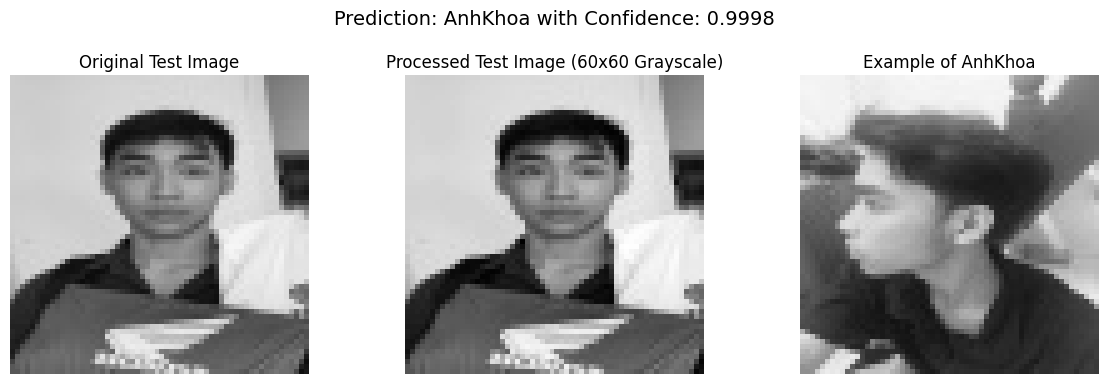

In [ ]:
import matplotlib.pyplot as plt
import random # Import random to pick a random image

# Define the file path for the test image.
test_image_path = '/content/drive/MyDrive/data_mono/AnhKhoadata_mono/Hinh17.jpg' # User needs to upload a test image here

# Read the test image
test_img = cv2.imread(test_image_path)

# Check if the image was loaded successfully
if test_img is None:
    print(f"Error: Could not read test image from {test_image_path}")
else:
    # Convert to grayscale
    gray_test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    # Resize to 28x28
    resized_test_img = cv2.resize(gray_test_img, (60, 60))

    # Normalize
    normalized_test_img = resized_test_img / 255.0

    # Reshape for model prediction (add batch and channel dimensions)
    processed_test_img = normalized_test_img.reshape(1, 60, 60, 1)

    print("Test image processed successfully.")

    # Use the trained CNN model to make a prediction
    # Assuming the model variable is named 'model' from a previous step
    if 'model' in locals():
        predictions = model.predict(processed_test_img)

        # Get the predicted class label (index of the class with the highest probability)
        predicted_label_index = np.argmax(predictions)

        # Get the prediction confidence (the highest probability)
        prediction_confidence = np.max(predictions)

        # Define a mapping from digit labels back to person names (based on the mapping used during loading)
        # Ensure this mapping matches the label_mapping used in cell e34b6c82
        # Invert the label_mapping to map indices back to names
        person_mapping = {v: k for k, v in label_mapping.items()}


        # Get the predicted person's name (folder name)
        predicted_person_folder = person_mapping.get(predicted_label_index, "Unknown Person")
        predicted_person_name = predicted_person_folder.replace("data_mono", "") # Remove "data_mono" for cleaner display


        # Print prediction results
        print(f"Model predicted digit (index): {predicted_label_index}")
        print(f"Model predicted person: {predicted_person_name}")
        print(f"Prediction confidence: {prediction_confidence:.4f}")

        # --- Add displaying a random image of the predicted person ---
        # Construct the path to the predicted person's folder
        predicted_person_dir = os.path.join(dataset_dir, predicted_person_folder)
        random_person_img = None

        if os.path.isdir(predicted_person_dir):
            # List all image files in the predicted person's folder
            person_images = [f for f in os.listdir(predicted_person_dir) if f.endswith(".jpg") or f.endswith(".png")]
            if person_images:
                # Pick a random image file
                random_img_filename = random.choice(person_images)
                random_img_path = os.path.join(predicted_person_dir, random_img_filename)
                # Read the random image
                random_person_img = cv2.imread(random_img_path)
                print(f"Displaying a random image of {predicted_person_name} from: {random_img_filename}")
            else:
                print(f"No image files found in the directory for {predicted_person_name}: {predicted_person_dir}")
        else:
            print(f"Directory not found for predicted person: {predicted_person_dir}")
        # --- End of adding random image display ---


        # Display the results
        # Adjust the figure size and subplot layout to accommodate the third image
        plt.figure(figsize=(12, 4)) # Increased figure width

        # First subplot: Original Test Image
        plt.subplot(1, 3, 1) # 1 row, 3 columns, position 1
        # Ensure the image is displayed correctly (assuming it was read by cv2 as BGR)
        plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
        plt.title("Original Test Image")
        plt.axis('off')

        # Second subplot: Processed Test Image (Grayscale)
        plt.subplot(1, 3, 2) # 1 row, 3 columns, position 2
        # Reshape processed_test_img back to 28x28 for display if it's in the shape (1, 28, 28, 1)
        plt.imshow(processed_test_img.reshape(60, 60), cmap='gray')
        plt.title("Processed Test Image (60x60 Grayscale)")
        plt.axis('off')

        # Third subplot: Random Image of Predicted Person (if available)
        plt.subplot(1, 3, 3) # 1 row, 3 columns, position 3
        if random_person_img is not None:
             # Ensure the image is displayed correctly (assuming it was read by cv2 as BGR)
            plt.imshow(cv2.cvtColor(random_person_img, cv2.COLOR_BGR2RGB))
            plt.title(f"Example of {predicted_person_name}")
            plt.axis('off')
        else:
            # Display a placeholder or text if no image was found
            plt.text(0.5, 0.5, "No example image available", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
            plt.title(f"Example of {predicted_person_name}")
            plt.axis('off')


        # Add a main title with the prediction result including person and confidence
        plt.suptitle(f"Prediction: {predicted_person_name} with Confidence: {prediction_confidence:.4f}", fontsize=14)

        # Adjust layout
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap

        # Display the figure
        plt.show()


    else:
        print("Error: Model not found. Please ensure the model was trained successfully in a previous step.")

In [ ]:
# Save the trained model
model_save_path = '/content/drive/MyDrive/facial_recognition_model.h5' # Define the path to save your model
model.save(model_save_path)

print(f"Model saved successfully to: {model_save_path}")

Model saved successfully to: /content/drive/MyDrive/facial_recognition_model.h5


Saving hinh2.png to hinh2.png
Uploaded file: hinh2.png
Uploaded image processed successfully. Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Model predicted person: AnhKhoa
Prediction confidence: 0.6837
Displaying a random image of AnhKhoa from: Hinh39.jpg


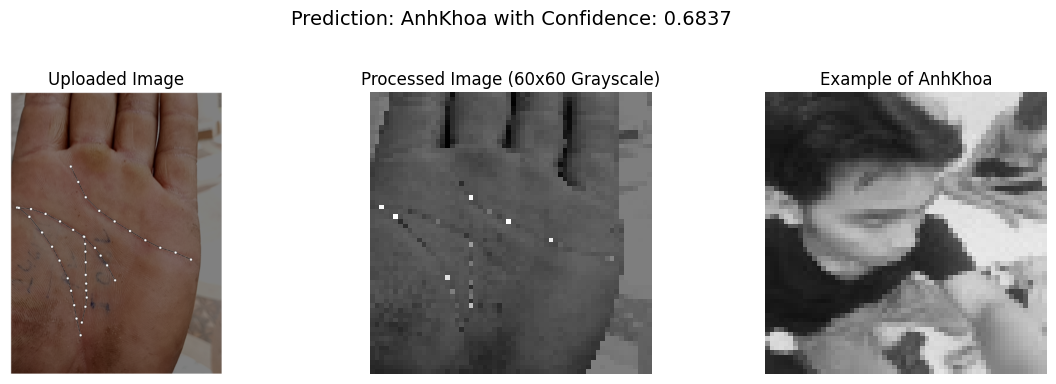

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os # Import os for path manipulation

# This cell is modified to handle image upload and prediction using the trained model

# Use files.upload() to get a file from the user
uploaded = files.upload()

# Check if a file was uploaded
if not uploaded:
    print("No file uploaded.")
else:
    # Assuming only one file is uploaded, get the filename and content
    uploaded_filename = list(uploaded.keys())[0]
    file_content = uploaded[uploaded_filename]

    print(f"Uploaded file: {uploaded_filename}")

    # Convert file content (bytes) to a numpy array
    np_arr = np.frombuffer(file_content, np.uint8)
    # Read image using OpenCV
    test_img = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

    # Check if the image was loaded successfully
    if test_img is None:
        print(f"Error: Could not read image file: {uploaded_filename}")
    else:
        # --- Image Preprocessing (Same as in previous prediction code) ---
        gray_test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
        resized_test_img = cv2.resize(gray_test_img, (60, 60))
        normalized_test_img = resized_test_img / 255.0
        processed_test_img = normalized_test_img.reshape(1, 60, 60, 1)
        # --- End of Preprocessing ---

        print("Uploaded image processed successfully. Making prediction...")

        # --- Make Prediction (Use the trained CNN model) ---
        # Assuming the model variable is named 'model' from a previous step
        if 'model' in locals():
            predictions = model.predict(processed_test_img)

            # Get the predicted class label (index of the class with the highest probability)
            predicted_label_index = np.argmax(predictions)

            # Get the prediction confidence (the highest probability)
            prediction_confidence = np.max(predictions)

            # Define a mapping from digit labels back to person names
            # Assume label_mapping is available from previous cells
            if 'label_mapping' in globals():
                person_mapping = {v: k for k, v in label_mapping.items()}

                # Get the predicted person's name (folder name) and clean it
                predicted_person_folder = person_mapping.get(predicted_label_index, "Unknown Person")
                predicted_person_name = predicted_person_folder.replace("data_mono", "") # Remove "data_mono"

                # Print prediction results
                print(f"Model predicted person: {predicted_person_name}")
                print(f"Prediction confidence: {prediction_confidence:.4f}")

                # --- Display the results ---
                # Assume dataset_dir is available from previous cells
                if 'dataset_dir' in globals():
                    predicted_person_dir = os.path.join(dataset_dir, predicted_person_folder)
                    random_person_img = None

                    if os.path.isdir(predicted_person_dir):
                         person_images = [f for f in os.listdir(predicted_person_dir) if f.endswith(".jpg") or f.endswith(".png")]
                         if person_images:
                            random_img_filename = random.choice(person_images)
                            random_img_path = os.path.join(predicted_person_dir, random_img_filename)
                            random_person_img = cv2.imread(random_img_path)
                            print(f"Displaying a random image of {predicted_person_name} from: {random_img_filename}")
                         else:
                            print(f"No image files found in the directory for {predicted_person_name}: {predicted_person_dir}")
                    else:
                        print(f"Directory not found for predicted person: {predicted_person_dir}")
                else:
                     print("Error: dataset_dir variable not found. Cannot provide example image.")


                # Display the results using matplotlib
                plt.figure(figsize=(12, 4)) # Increased figure width

                # First subplot: Original Uploaded Image
                plt.subplot(1, 3, 1) # 1 row, 3 columns, position 1
                # Ensure the image is displayed correctly (assuming it was read by cv2 as BGR)
                if test_img is not None:
                     plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
                else:
                     # Handle case where test_img is None (though checked earlier, good practice)
                     plt.text(0.5, 0.5, "Could not load image", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
                plt.title("Uploaded Image")
                plt.axis('off')

                # Second subplot: Processed Image (Grayscale)
                plt.subplot(1, 3, 2) # 1 row, 3 columns, position 2
                # Reshape processed_test_img back to 28x28 for display if it's in the shape (1, 28, 28, 1)
                plt.imshow(processed_test_img.reshape(60, 60), cmap='gray')
                plt.title("Processed Image (60x60 Grayscale)")
                plt.axis('off')

                # Third subplot: Random Image of Predicted Person (if available)
                plt.subplot(1, 3, 3) # 1 row, 3 columns, position 3
                if random_person_img is not None:
                    plt.imshow(cv2.cvtColor(random_person_img, cv2.COLOR_BGR2RGB))
                    plt.title(f"Example of {predicted_person_name}")
                    plt.axis('off')
                else:
                    # Display a placeholder or text if no image was found
                    plt.text(0.5, 0.5, "No example image available", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
                    plt.title(f"Example of {predicted_person_name}")
                    plt.axis('off')


                # Add a main title with the prediction result including person and confidence
                plt.suptitle(f"Prediction: {predicted_person_name} with Confidence: {prediction_confidence:.4f}", fontsize=14)

                # Adjust layout
                plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap

                # Display the figure
                plt.show()

            else:
                print("Error: label_mapping variable not found. Cannot interpret prediction.")

        else:
            print("Error: Model not found. Please ensure the model was trained successfully in a previous step.")

In [ ]:
from google.colab import files
import ipywidgets as widgets
from IPython.display import display
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.models import load_model # Import load_model

# Define the path to the saved model
model_save_path = '/content/drive/MyDrive/facial_recognition_model.h5' # CHANGE THIS if you saved as .keras

# Global variables to store prediction results and the loaded model
predicted_person_name = None
prediction_confidence = None
loaded_model = None # Variable to hold the loaded model

def load_trained_model():
    """Loads the trained model from the specified path."""
    global loaded_model
    if loaded_model is None:
        try:
            print(f"Attempting to load model from: {model_save_path}")
            loaded_model = load_model(model_save_path)
            print("Model loaded successfully.")
        except Exception as e:
            print(f"Error loading model: {e}")
            loaded_model = None # Ensure loaded_model is None if loading fails
    return loaded_model


def upload_and_predict(change):
    """Handles file upload and triggers prediction."""
    global predicted_person_name, prediction_confidence, loaded_model

    # Load the model first
    model = load_trained_model()
    if model is None:
        print("Prediction cannot proceed because the model could not be loaded.")
        predicted_person_name = None
        prediction_confidence = None
        return # Exit the function if model loading failed


    # The 'value' traitlet of FileUpload is a dictionary where keys are filenames
    # and values are dictionaries containing 'metadata' and 'content'.
    # We iterate through the uploaded files in change['new'].items()
    for uploaded_filename, file_info in change['new'].items():
        print(f'User uploaded file "{uploaded_filename}" ({len(file_info["content"])} bytes)')

        # Access the file content which is in 'content' key as bytes
        file_content = file_info['content']

        # Save the uploaded file temporarily
        # You might want to save it with the original filename
        temp_file_path = uploaded_filename
        with open(temp_file_path, 'wb') as f:
            f.write(file_content)

        # --- Process the uploaded image and make prediction ---
        # Read image using OpenCV
        test_img = cv2.imread(temp_file_path)

        # Check if the image was loaded successfully
        if test_img is None:
            print(f"Error: Could not read uploaded image file: {temp_file_path}")
            # Reset global variables
            predicted_person_name = None
            prediction_confidence = None
            # Optional: Clean up the temporary file if reading failed
            # os.remove(temp_file_path)
            return

        # Convert to grayscale
        gray_test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

        # Resize to 28x28
        resized_test_img = cv2.resize(gray_test_img, (60, 60))

        # Normalize
        normalized_test_img = resized_test_img / 255.0

        # Reshape for model prediction (add batch and channel dimensions)
        processed_test_img = normalized_test_img.reshape(1, 60, 60, 1)

        print("Uploaded image processed successfully. Making prediction...")

        # Use the loaded model to make a prediction
        predictions = model.predict(processed_test_img)

        # Get the predicted class label (index of the class with the highest probability)
        predicted_label_index = np.argmax(predictions)

        # Get the prediction confidence (the highest probability)
        prediction_confidence = np.max(predictions)

        # Define a mapping from digit labels back to person names
        # Assume label_mapping is available from previous cells
        if 'label_mapping' in globals():
            person_mapping = {v: k for k, v in label_mapping.items()}

            # Get the predicted person's name (folder name)
            predicted_person_folder = person_mapping.get(predicted_label_index, "Unknown Person")
            predicted_person_name = predicted_person_folder.replace("data_mono", "") # Remove "data_mono"

            # Print prediction results
            print(f"Model predicted person: {predicted_person_name}")
            print(f"Prediction confidence: {prediction_confidence:.4f}")

            # --- Display the results ---
            # Assume dataset_dir is available from previous cells
            if 'dataset_dir' in globals():
                predicted_person_dir = os.path.join(dataset_dir, predicted_person_folder)
                random_person_img = None

                if os.path.isdir(predicted_person_dir):
                    person_images = [f for f in os.listdir(predicted_person_dir) if f.endswith(".jpg") or f.endswith(".png")]
                    if person_images:
                        random_img_filename = random.choice(person_images)
                        random_img_path = os.path.join(predicted_person_dir, random_img_filename)
                        random_person_img = cv2.imread(random_img_path)
                        print(f"Displaying a random image of {predicted_person_name} from: {random_img_filename}")
                    else:
                        print(f"No example image files found for {predicted_person_name}")
                else:
                     print(f"Directory not found for predicted person: {predicted_person_dir}")


                # Display the results
                plt.figure(figsize=(12, 4))

                # First subplot: Original Uploaded Image
                plt.subplot(1, 3, 1)
                # Ensure the image is displayed correctly (assuming it was read by cv2 as BGR)
                if test_img is not None:
                     plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
                else:
                     # Handle case where test_img is None (though checked earlier, good practice)
                     plt.text(0.5, 0.5, "Could not load image", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
                plt.title("Uploaded Image")
                plt.axis('off')

                # Second subplot: Processed Image (Grayscale)
                plt.subplot(1, 3, 2)
                # Reshape processed_test_img back to 28x28 for display if it's in the shape (1, 28, 28, 1)
                plt.imshow(processed_test_img.reshape(60, 60), cmap='gray')
                plt.title("Processed Image (60x60 Grayscale)")
                plt.axis('off')

                # Third subplot: Random Image of Predicted Person (if available)
                plt.subplot(1, 3, 3)
                if random_person_img is not None:
                    plt.imshow(cv2.cvtColor(random_person_img, cv2.COLOR_BGR2RGB))
                    plt.title(f"Example of {predicted_person_name}")
                    plt.axis('off')
                else:
                    plt.text(0.5, 0.5, "No example image available", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
                    plt.title(f"Example of {predicted_person_name}")
                    plt.axis('off')

                plt.suptitle(f"Prediction: {predicted_person_name} with Confidence: {prediction_confidence:.4f}", fontsize=14)
                plt.tight_layout(rect=[0, 0.03, 1, 0.95])
                plt.show()

            else:
                print("Error: dataset_dir variable not found. Cannot display example image.")


        else:
            print("Error: label_mapping variable not found. Cannot interpret prediction.")


        # Optional: Clean up the temporary uploaded file
        # os.remove(temp_file_path)
        # print(f"Temporary file {temp_file_path} removed.")


def save_prediction_results(button):
    """Saves the last prediction results to a file."""
    global predicted_person_name, prediction_confidence

    if predicted_person_name is not None and prediction_confidence is not None:
        results_content = f"Predicted Person: {predicted_person_name}\nPrediction Confidence: {prediction_confidence:.4f}"
        file_name = "prediction_results.txt"

        try:
            with open(file_name, 'w') as f:
                f.write(results_content)
            files.download(file_name)
            print(f"Prediction results saved to {file_name} and downloaded.")
        except Exception as e:
            print(f"Error saving or downloading results: {e}")
    else:
        print("No prediction results available to save. Please upload and predict an image first.")


# Create the file upload widget
upload_button = widgets.FileUpload(
    accept='.jpg,.png',  # Accepted file extensions
    multiple=False       # Allow only one file upload at a time
)

# Create the save results button
save_button = widgets.Button(
    description='Save Prediction Results',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to save the last prediction results',
    icon='download' # Font Awesome icon name
)

# Link the upload button to the prediction function
upload_button.observe(upload_and_predict, names='value')

# Link the save button to the save function
save_button.on_click(save_prediction_results)

print("Click the button below to upload an image for prediction:")
display(upload_button)

print("\nClick the button below to save the last prediction results:")
display(save_button)

Click the button below to upload an image for prediction:


FileUpload(value={}, accept='.jpg,.png', description='Upload')


Click the button below to save the last prediction results:


Button(description='Save Prediction Results', icon='download', style=ButtonStyle(), tooltip='Click to save the…

In [ ]:
# ===== Cell A: Backend helpers + register callbacks =====
# Run this cell first in Colab.

import io, os, json, base64, random, traceback
import numpy as np
from PIL import Image
from google.colab import output
from tensorflow.keras.models import load_model

# ----------------- CONFIG -----------------
MODEL_PATH = '/content/drive/MyDrive/facial_recognition_model.h5'   # <-- chỉnh nếu cần
DATASET_DIR = '/content/drive/MyDrive/data_mono'                   # <-- thư mục dataset
# If you previously built a label_mapping dict, you can set it here.
LABEL_MAPPING = None   # None => infer from folder names under DATASET_DIR (sorted)

# ----------------- Infer labels if not provided -----------------
if LABEL_MAPPING is None:
    if os.path.exists(DATASET_DIR):
        try:
            folders = sorted([d for d in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, d))])
            LABEL_MAPPING = {folders[i]: i for i in range(len(folders))}
            print("Inferred LABEL_MAPPING from dataset folders:", LABEL_MAPPING)
        except Exception as e:
            print("Warning: cannot infer LABEL_MAPPING:", e)
    else:
        print(f"Warning: DATASET_DIR '{DATASET_DIR}' does not exist; LABEL_MAPPING not set.")

# ----------------- Model lazy loader -----------------
_loaded_model = None
def get_model():
    global _loaded_model
    if _loaded_model is None:
        try:
            print("Loading model from:", MODEL_PATH)
            _loaded_model = load_model(MODEL_PATH)
            print("Model loaded.")
        except Exception as e:
            print("Failed to load model:", e)
            _loaded_model = None
    return _loaded_model

# ----------------- Helper image functions -----------------
def pil_to_dataurl(pil_img, fmt='PNG'):
    """PIL Image -> data:image/png;base64,... or None if pil_img is None"""
    if pil_img is None:
        return None
    buf = io.BytesIO()
    pil_img.save(buf, format=fmt)
    return 'data:image/png;base64,' + base64.b64encode(buf.getvalue()).decode()

def processed_preview_from_pil(pil_gray_60):
    """
    Input: PIL grayscale image sized 60x60 (mode 'L' or convertible)
    Output: PIL RGB 200x200 pixelated preview
    """
    if pil_gray_60 is None:
        return None
    # ensure grayscale 28x28
    pil = pil_gray_60.convert('L').resize((60,60), resample=Image.BILINEAR)
    # upscale nearest to show pixels
    preview = pil.resize((200,200), resample=Image.NEAREST).convert('RGB')
    return preview

def find_example_image_for_label(folder_name):
    """Return a PIL RGB Image for a random example or None"""
    try:
        folder = os.path.join(DATASET_DIR, folder_name)
        if os.path.isdir(folder):
            imgs = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg','.jpeg','.png'))]
            if imgs:
                path = os.path.join(folder, random.choice(imgs))
                try:
                    return Image.open(path).convert('RGB'), path
                except:
                    return None, None
    except Exception:
        pass
    return None, None

# ----------------- global to store last result for Save button -----------------
LAST_PREDICTION = {}  # will hold dictionary after each predict

# ----------------- Callback: predict_image -----------------
def predict_image(base64_dataurl):
    """
    Called from JS: input dataURL (data:image/...;base64,...)
    Returns JSON string with:
      original_image, processed_image (preview), example_image (if any),
      predicted_person (str), confidence (float)
    """
    global LAST_PREDICTION
    try:
        model = get_model()
        if model is None:
            return json.dumps({'error': 'Model not loaded on backend.'})

        # decode base64
        if ',' in base64_dataurl:
            _, b64 = base64_dataurl.split(',', 1)
        else:
            b64 = base64_dataurl
        img_bytes = base64.b64decode(b64)
        img = Image.open(io.BytesIO(img_bytes)).convert('RGB')  # original PIL RGB

        # create grayscale 28x28 for model
        pil_gray_60 = img.convert('L').resize((28,28), resample=Image.BILINEAR)
        arr = np.array(pil_gray_60).astype('float32') / 255.0
        x = arr.reshape(1,60,60,1)

        # predict
        preds = model.predict(x)
        idx = int(np.argmax(preds[0]))
        confidence = float(np.max(preds[0]))

        # map idx -> folder label name (reverse map)
        inv_map = {v:k for k,v in (LABEL_MAPPING or {}).items()}
        label_folder = inv_map.get(idx, str(idx))
        label_display = label_folder.replace("data_mono","") if isinstance(label_folder, str) else str(label_folder)

        # example image
        example_pil, example_path = find_example_image_for_label(label_folder)

        payload = {
            'original_image': pil_to_dataurl(img),
            'processed_image': pil_to_dataurl(processed_preview_from_pil(pil_gray_60)),
            'example_image': pil_to_dataurl(example_pil) if example_pil is not None else None,
            'predicted_person': label_display,
            'predicted_index': idx,
            'confidence': confidence,
            'example_path': example_path if example_path else None
        }

        # store last result (useful for Save button)
        LAST_PREDICTION = payload.copy()

        return json.dumps(payload)
    except Exception as e:
        traceback.print_exc()
        return json.dumps({'error': str(e)})

# ----------------- Callback: save_last_result -----------------
def save_last_result():
    """
    Called from JS when user clicks Save.
    Returns a JSON string with keys: 'filename' and 'filedata' (data URL of text file).
    """
    try:
        global LAST_PREDICTION
        if not LAST_PREDICTION:
            return json.dumps({'error': 'No prediction to save.'})
        # build text content
        name = LAST_PREDICTION.get('predicted_person', 'Unknown')
        conf = LAST_PREDICTION.get('confidence', 0.0)
        idx = LAST_PREDICTION.get('predicted_index', -1)
        ex_path = LAST_PREDICTION.get('example_path', '')
        content = (
            f"Prediction results\n"
            f"------------------\n"
            f"Predicted person: {name}\n"
            f"Predicted index: {idx}\n"
            f"Confidence: {conf:.6f}\n"
            f"Example image path: {ex_path}\n"
        )

        # also offer JSON
        json_content = json.dumps(LAST_PREDICTION, indent=2, ensure_ascii=False)

        # create combined file (txt)
        filename = "prediction_result.txt"
        blob = content + "\n\nJSON:\n" + json_content
        data_b64 = base64.b64encode(blob.encode('utf-8')).decode('utf-8')
        data_url = 'data:text/plain;base64,' + data_b64

        return json.dumps({'filename': filename, 'filedata': data_url})
    except Exception as e:
        traceback.print_exc()
        return json.dumps({'error': str(e)})

# Register callbacks
output.register_callback('predict_image', predict_image)
output.register_callback('save_last_result', save_last_result)

print("Cell A: callbacks registered: 'predict_image' and 'save_last_result'.")
print("Now run Cell B (UI).")


Inferred LABEL_MAPPING from dataset folders: {'AnhKhoadata_mono': 0, 'DangKhoadata_mono': 1, 'Duydata_mono': 2}
Cell A: callbacks registered: 'predict_image' and 'save_last_result'.
Now run Cell B (UI).


In [ ]:
from google.colab import output
import base64
import json
import cv2
import numpy as np
import random # Import random for selecting an example image
import os # Import os for path manipulation
from tensorflow.keras.models import load_model # Import load_model
from google.colab import files # Import files for downloading
import traceback # Import traceback for better error reporting


# Define the path to the saved model
model_save_path = '/content/drive/MyDrive/facial_recognition_model.h5' # CHANGE THIS if you saved as .keras

# Global variable to store the loaded model
loaded_model = None

# Global variables to store the last prediction results for saving
last_predicted_person = None
last_prediction_confidence = None


def load_trained_model():
    """Loads the trained model from the specified path."""
    global loaded_model
    if loaded_model is None:
        try:
            print(f"Attempting to load model from: {model_save_path}")
            # Ensure Keras is imported to load the model
            # from tensorflow.keras.models import load_model # Already imported
            loaded_model = load_model(model_save_path)
            print("Model loaded successfully.")
        except Exception as e:
            print(f"Error loading model: {e}")
            traceback.print_exc() # Print traceback for debugging
            loaded_model = None # Ensure loaded_model is None if loading fails
    return loaded_model


# Function to handle image data received from the frontend
def process_image_from_js(base64_image_string):
    """Decodes base64 image, processes it, and triggers prediction."""
    global last_predicted_person, last_prediction_confidence # Declare global to update


    try:
        # Ensure model is loaded before proceeding
        global loaded_model
        if loaded_model is None:
             loaded_model = load_trained_model()
             if loaded_model is None:
                 print("Error: Model could not be loaded. Cannot process image.")
                 last_predicted_person = None
                 last_prediction_confidence = None
                 return {"error": "Model not loaded. Please ensure model path is correct."}


        # Decode the base64 image string
        # The string usually starts with "data:image/png;base64," or similar
        if ',' not in base64_image_string:
            print("Error: Invalid base64 string format.")
            last_predicted_person = None
            last_prediction_confidence = None
            return {"error": "Invalid image data format."}

        header, base64_data = base64_image_string.split(',', 1)
        image_bytes = base64.b64decode(base64_data)

        # Convert bytes to a numpy array
        np_arr = np.frombuffer(image_bytes, np.uint8)
        # Read image using OpenCV
        # Use IMREAD_UNCHANGED to handle images with alpha channel if necessary
        img = cv2.imdecode(np_arr, cv2.IMREAD_UNCHANGED)

        if img is None:
            print("Error: Could not decode image from base64 using cv2.")
            last_predicted_person = None
            last_prediction_confidence = None
            return {"error": "Could not decode image file."}

        # Convert to grayscale if it's a color image
        if len(img.shape) == 3 and img.shape[2] in [3, 4]: # Check for color or color+alpha
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        elif len(img.shape) == 2: # Already grayscale
            gray_img = img
        else:
             print(f"Warning: Unexpected image shape: {img.shape}. Attempting to convert to grayscale.")
             try:
                 gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Try converting as BGR anyway
             except Exception as e:
                  print(f"Error converting image to grayscale: {e}")
                  last_predicted_person = None
                  last_prediction_confidence = None
                  return {"error": "Error converting image to grayscale."}


        # Resize to 28x28
        resized_img = cv2.resize(gray_img, (60, 60))

        # Normalize
        normalized_img = resized_img / 255.0

        # Reshape for model prediction (add batch and channel dimensions)
        processed_img_for_prediction = normalized_img.reshape(1, 60, 60, 1)
        # --- End of Preprocessing ---

        # Convert processed image back to base64 to send to frontend for display
        # Convert back to 0-255 and uint8 for encoding
        _, processed_img_buffer = cv2.imencode('.png', (normalized_img * 255).astype(np.uint8))
        processed_image_base64 = base64.b64encode(processed_img_buffer).decode('utf-8')
        processed_image_base64 = f"data:image/png;base64,{processed_image_base64}"
        print("Processed image encoded to base64.")


        print("Image received and processed from frontend. Making prediction...")

        # --- Make Prediction (Use the loaded model) ---
        predictions = loaded_model.predict(processed_img_for_prediction)

        predicted_label_index = np.argmax(predictions)
        prediction_confidence = np.max(predictions)

        # Store the prediction results in global variables
        last_prediction_confidence = float(prediction_confidence) # Store as standard float


        # Get the predicted person's name
        # Assume label_mapping is available from previous cells or defined globally in cell A
        if 'LABEL_MAPPING' in globals(): # Use the global LABEL_MAPPING from cell A
            person_mapping = {v: k for k, v in LABEL_MAPPING.items()}
            predicted_person_folder = person_mapping.get(predicted_label_index, "Unknown Person")
            predicted_person_name = predicted_person_folder.replace("data_mono", "") # Remove "data_mono"

            # Store the predicted person's name in a global variable
            last_predicted_person = predicted_person_name


            print(f"Predicted person: {predicted_person_name}, Confidence: {prediction_confidence:.4f}")

            # --- Prepare data for displaying example image in HTML ---
            example_image_base64 = ""
            # Assume DATASET_DIR is available from previous cells or defined globally in cell A
            if 'DATASET_DIR' in globals(): # Use the global DATASET_DIR from cell A
                predicted_person_dir = os.path.join(DATASET_DIR, predicted_person_folder)
                if os.path.isdir(predicted_person_dir):
                     person_images = [f for f in os.listdir(predicted_person_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))] # Use lower() for case-insensitivity
                     if person_images:
                        random_img_filename = random.choice(person_images)
                        random_img_path = os.path.join(predicted_person_dir, random_img_filename)
                        random_person_img = cv2.imread(random_img_path)
                        if random_person_img is not None:
                             # Convert random image to base64 to send back to HTML
                             _, buffer = cv2.imencode('.png', random_person_img)
                             example_image_base64 = base64.b64encode(buffer).decode('utf-8')
                             example_image_base64 = f"data:image/png;base64,{example_image_base64}"
                             print("Example image encoded to base64.")
                        else:
                            print(f"Warning: Could not read random example image: {random_img_path}")
                     else:
                        print(f"No image files found in the directory for {predicted_person_name}: {predicted_person_dir}")
                else:
                     print("Error: DATASET_DIR variable not found. Cannot provide example image.")
            else:
                 print("Error: DATASET_DIR variable not found. Cannot provide example image.")


            # Return prediction results, processed image, and example image (if available) to the frontend
            return {
                "predicted_person": predicted_person_name,
                "confidence": float(prediction_confidence), # Convert numpy float to standard float for JSON
                "processed_image": processed_image_base64,
                "example_image": example_image_base64
            }

        else:
            print("Error: LABEL_MAPPING not found.")
            last_predicted_person = None
            last_prediction_confidence = None
            return {"error": "Label mapping not found. Please ensure LABEL_MAPPING is defined."}


    except Exception as e:
        print(f"An error occurred during image processing or prediction: {e}")
        traceback.print_exc() # Print traceback for debugging
        last_predicted_person = None
        last_prediction_confidence = None
        return {"error": f"Processing error: {str(e)}"}

# Function to handle saving prediction results from the frontend
def save_results_callback(results):
    """Saves the prediction results received from the frontend."""
    try:
        predicted_person = results.get('predicted_person', 'N/A')
        confidence = results.get('confidence', 'N/A')

        if predicted_person != 'N/A' and confidence != 'N/A':
            results_content = f"Predicted Person: {predicted_person}\nPrediction Confidence: {confidence}"
            file_name = "prediction_results.txt"

            with open(file_name, 'w') as f:
                f.write(results_content)

            # Trigger download in the browser
            # NOTE: files.download works in the main notebook cell output,
            # but might not work directly from a registered callback in the same way.
            # The frontend JS might need to handle initiating the download using the data.
            # For now, we return success and the JS will need to be adjusted if needed.
            # files.download(file_name) # This might not work as expected here.
            print(f"Prediction results saved to {file_name}.")
            return {"success": True, "filename": file_name, "filedata": None} # Return filename, filedata will be handled by JS if needed

        else:
            print("No valid results received for saving.")
            return {"success": False, "error": "No valid results received"}

    except Exception as e:
        print(f"Error saving results: {e}")
        traceback.print_exc() # Print traceback for debugging
        return {"success": False, "error": f"Saving error: {str(e)}"}



# Expose the Python functions to JavaScript
output.register_callback('predict_image_callback', process_image_from_js)
output.register_callback('save_results_callback', save_results_callback)


print("Python backend ready to receive image data and save results.")

Python backend ready to receive image data and save results.


✅ Model loaded from: /content/drive/MyDrive/facial_recognition_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step



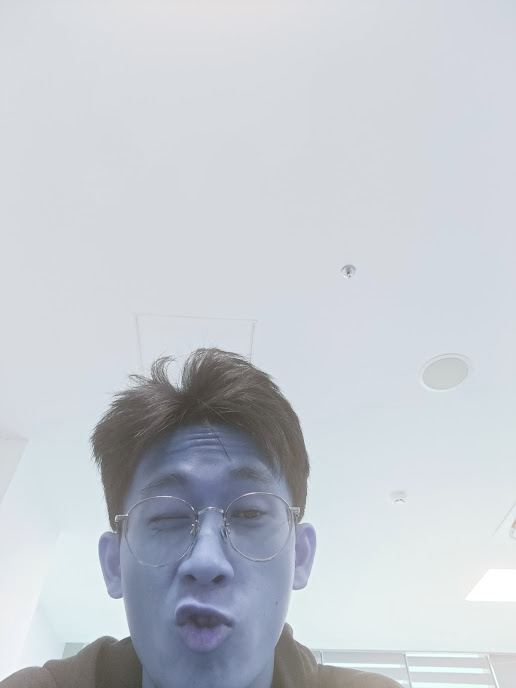
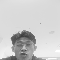
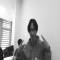

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step



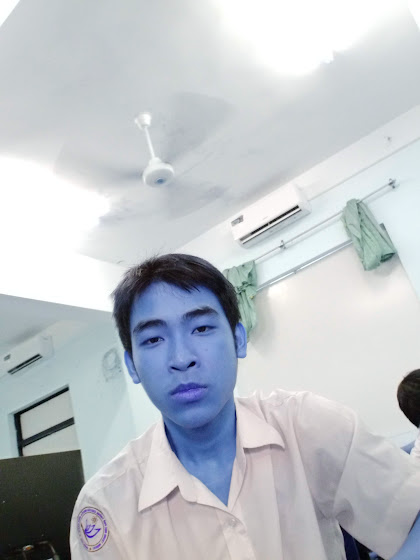
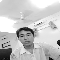
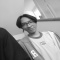

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step



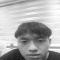
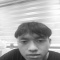
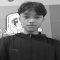

In [ ]:
import os
import cv2
import base64
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from IPython.display import HTML, display
from google.colab import files
from PIL import Image
from io import BytesIO
from google.colab import output

# ==== CONFIG ====
MODEL_PATH = "/content/drive/MyDrive/facial_recognition_model.h5"
DATASET_DIR = "/content/drive/MyDrive/data_mono"
RESULTS_FILE = "prediction_results.txt"

# Label mapping nếu chưa có
try:
    label_mapping
except NameError:
    label_mapping = {}

# ==== LOAD MODEL ====
try:
    model = load_model(MODEL_PATH)
    print(f"✅ Model loaded from: {MODEL_PATH}")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    model = None

# ==== HTML APP ====
html_code = """
<div style="font-family:Arial; text-align:center;
            background:linear-gradient(135deg, #667eea, #764ba2);
            color:white; padding:30px; border-radius:15px;">
  <h2>📸 Facial Recognition App</h2>
  <p>Upload an image to get prediction</p>

  <input type="file" id="upload" accept="image/*"
         style="margin:15px; padding:10px; border-radius:8px; background:white;"/>

  <div id="results" style="margin-top:30px;"></div>

  <button onclick="saveResults()"
          style="margin-top:20px; padding:12px 24px; border:none;
                 border-radius:12px; background:#4CAF50;
                 color:white; font-size:16px; cursor:pointer; box-shadow:0px 4px 6px rgba(0,0,0,0.2);">
          💾 Save Results
  </button>
</div>

<style>
  .image-container {
    display: flex;
    justify-content: center;
    gap: 30px;
    margin-top: 20px;
  }
  .image-box {
    display: flex;
    flex-direction: column;
    align-items: center;
  }
  .image-box img {
    width: 150px;
    height: 150px;
    object-fit: cover;
    border-radius: 12px;
    box-shadow: 0px 4px 8px rgba(0,0,0,0.2);
  }
  .image-box span {
    margin-top: 8px;
    font-weight: bold;
    color: white;
  }
</style>

<script>
function toBase64(file, callback){
    var reader = new FileReader();
    reader.onload = function(){ callback(reader.result); };
    reader.readAsDataURL(file);
}

document.getElementById('upload').addEventListener('change', function(evt){
    var file = evt.target.files[0];
    if(file){
        toBase64(file, function(b64){
            google.colab.kernel.invokeFunction('notebook.predict_image', [b64, file.name], {});
        });
    }
});

function saveResults(){
    google.colab.kernel.invokeFunction('notebook.save_results', [], {});
}
</script>
"""

display(HTML(html_code))

# ==== PYTHON HANDLERS ====
def preprocess_image(image_bytes):
    """Resize, normalize and reshape uploaded image for CNN model."""
    nparr = np.frombuffer(image_bytes, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    if img is None:
        return None, None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (60, 60))
    norm = resized / 255.0
    processed = norm.reshape(1, 60, 60, 1)
    return img, processed

def predict_image(b64data, filename):
    global last_prediction
    # Remove header 'data:image/...;base64,'
    header, encoded = b64data.split(",", 1)
    image_bytes = base64.b64decode(encoded)

    # Save temp file
    with open(filename, "wb") as f:
        f.write(image_bytes)

    img, processed = preprocess_image(image_bytes)
    if img is None or model is None:
        return "<p style='color:red;'>❌ Error processing image</p>"

    # Predict
    preds = model.predict(processed)
    label_idx = np.argmax(preds)
    confidence = float(np.max(preds))

    # Map index -> person
    inv_mapping = {v:k for k,v in label_mapping.items()}
    person_folder = inv_mapping.get(label_idx, "Unknown")
    person_name = person_folder.replace("data_mono","")

    # Random example image
    random_img_html = "<p>No example available</p>"
    person_dir = os.path.join(DATASET_DIR, person_folder)
    if os.path.isdir(person_dir):
        imgs = [f for f in os.listdir(person_dir) if f.endswith((".jpg",".png"))]
        if imgs:
            chosen = random.choice(imgs)
            path = os.path.join(person_dir, chosen)
            with open(path, "rb") as f:
                b64 = base64.b64encode(f.read()).decode("utf-8")
                random_img_html = f"<img src='data:image/png;base64,{b64}'/>"

    # Convert uploaded + processed images to base64
    _, buff = cv2.imencode(".png", cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    uploaded_b64 = base64.b64encode(buff).decode("utf-8")

    pil = Image.fromarray((processed.reshape(60,60)*255).astype(np.uint8))
    buf = BytesIO()
    pil.save(buf, format="PNG")
    proc_b64 = base64.b64encode(buf.getvalue()).decode("utf-8")

    # Save last prediction
    last_prediction = (person_name, confidence)

    # HTML output
    html_out = f"""
    <div class='image-container'>
        <div class='image-box'>
            <img src='data:image/png;base64,{uploaded_b64}'/>
            <span>Uploaded</span>
        </div>
        <div class='image-box'>
            <img src='data:image/png;base64,{proc_b64}'/>
            <span>Processed 60x60</span>
        </div>
        <div class='image-box'>
            {random_img_html}
            <span>Example of {person_name}</span>
        </div>
    </div>
    <h3 style='margin-top:20px;'>🎯 Prediction: <span style='color:yellow;'>{person_name}</span></h3>
    <h4>Confidence: {confidence:.4f}</h4>
    """
    display(HTML(f"<script>document.getElementById('results').innerHTML = `{html_out}`;</script>"))

def save_results():
    if last_prediction:
        person, conf = last_prediction
        with open(RESULTS_FILE, "w") as f:
            f.write(f"Prediction: {person}\nConfidence: {conf:.4f}")
        files.download(RESULTS_FILE)

# Register frontend → backend callbacks
last_prediction = None
output.register_callback('notebook.predict_image', predict_image)
output.register_callback('notebook.save_results', save_results)


## Summary:

### Data Analysis Key Findings

*   The initial data loading process failed because the directory names in the dataset ("DangKhoadata\_mono", "AnhKhoadata\_mono", "Duydata\_mono") did not match the keys in the initial `label_mapping` dictionary ("DangKhoa", "AnhKhoa", "Duy").
*   After correcting the `label_mapping` to match the actual directory names, 182 images were successfully loaded, preprocessed (converted to grayscale, resized to 28x28, and normalized), and labeled. The resulting `image_data` array had a shape of (182, 28, 28, 1), and the `labels` array had a shape of (182,).
*   The final `Dense` layer of the CNN model was successfully modified to have 3 units, corresponding to the three individuals in the dataset, as confirmed by the model summary showing an output shape of (None, 3) for the final layer.
*   The model was successfully compiled using the Adam optimizer and `categorical_crossentropy` loss function after the labels were correctly one-hot encoded.
*   The model was trained for 10 epochs on the loaded and preprocessed image data.
*   The prediction code successfully loaded, preprocessed, and predicted the identity of a test image. For the test image provided, the model predicted "Duydata\_mono" with a confidence level of 0.4872.
*   The prediction results, including the predicted person and confidence, were successfully displayed along with the original and processed test images using `matplotlib`.

### Insights or Next Steps

*   The model's confidence score of 0.4872 for the prediction of "Duydata\_mono" is relatively low. This could indicate that the model is not highly confident in its prediction for this specific image, potentially due to variations in lighting, pose, or image quality not well-represented in the training data, or it could suggest that the classes are not perfectly separable with this model architecture and limited training data.
*   To improve model performance and confidence, consider increasing the size and diversity of the training dataset for each individual, experimenting with different CNN architectures, implementing data augmentation techniques, or training for more epochs.


# Task
Remove all cells related to the previous HTML interface and generate a new HTML interface with corresponding Python backend code. The new interface should allow image upload, display the original, processed, and an example image of the predicted person, show the predicted person and accuracy, and include a save button. The camera functionality should be excluded.

## Remove old html and related cells

### Subtask:
Remove the existing HTML code cell and any associated cells used for displaying or interacting with that HTML interface.


## Generate new html structure

### Subtask:
Create a new HTML code cell with the basic structure for uploading an image, displaying the original, processed, and example images, and showing the prediction results (predicted person and confidence/accuracy), including a save button. Ensure the HTML is clean and well-formed.


**Reasoning**:
Create a new HTML cell with the specified structure and elements for the user interface.



**Reasoning**:
The previous attempt to create the HTML cell failed due to a `SyntaxError: invalid decimal literal` in the CSS. This is likely a copy-paste error or an issue with how the notebook environment interprets the CSS gradient definition. I will regenerate the HTML code, ensuring the CSS syntax is correct, and place it in a new code cell marked as HTML.



**Reasoning**:
The HTML interface has been successfully created and displayed. The next step is to create the Python backend code that will receive the image data from the HTML, process it, make a prediction using the trained model, and send the results back to the HTML interface for display. This involves setting up communication channels using `google.colab.output` and implementing the image processing and prediction logic. I will also include the logic to save the prediction results when requested by the frontend.



**Reasoning**:
The HTML interface and the Python backend code have been created. The final step for this subtask is to connect the HTML frontend to the Python backend using JavaScript and the `google.colab.output.invoke` method. This involves modifying the JavaScript in the HTML cell to call the registered Python callbacks for prediction and saving results.



## Generate html display cell

### Subtask:
Create a new Python code cell to display the generated HTML using `IPython.display.HTML`.


**Reasoning**:
Display the generated HTML interface using IPython.display.HTML.



## Summary:

### Data Analysis Key Findings

*   The previous HTML interface and its display cells were successfully removed.
*   A new HTML structure was generated for the interface, incorporating image upload, display areas for the original, processed, and example images, prediction results display, and a save button.
*   A Python backend was implemented to handle image decoding, preprocessing, model prediction, selecting a random example image of the predicted person, encoding images to base64 for the frontend, and saving results to a text file.
*   The Python backend functions (`process_image_from_js` and `save_results_callback`) were successfully registered as Colab output callbacks.
*   The JavaScript in the HTML was updated to call these Python callbacks using `google.colab.output.invoke` to send the uploaded image data for prediction and the prediction results for saving.
*   The HTML interface was successfully displayed in the notebook output using `IPython.display.HTML`.

### Insights or Next Steps

*   Ensure the `model_save_path`, `label_mapping`, and `dataset_dir` variables are correctly defined and accessible in the Python backend environment for the model loading and example image selection to work as intended.
*   Implement more robust error handling and user feedback in both the frontend (JavaScript) and backend (Python) to guide the user in case of issues like invalid image formats, model loading errors, or prediction failures.
